# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [ ]:
# !pip install tensorflow

In [ ]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.6.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [ ]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.1003 - accuracy: 0.7394 - val_loss: 0.6582 - val_accuracy: 0.8536
Epoch 2/70
750/750 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.8534 - val_loss: 0.5094 - val_accuracy: 0.8778
Epoch 3/70
750/750 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.8693 - val_loss: 0.4513 - val_accuracy: 0.8860
Epoch 4/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.8772 - val_loss: 0.4184 - val_accuracy: 0.8923
Epoch 5/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8829 - val_loss: 0.3972 - val_accuracy: 0.8949
Epoch 6/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8874 - val_loss: 0.3821 - val_accuracy: 0.8992
Epoch 7/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8902 - val_loss: 0.3706 - val_accuracy: 0.9001
Epoch 

In [ ]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.0970 - accuracy: 0.7453 - val_loss: 0.6584 - val_accuracy: 0.8598
Epoch 2/70
750/750 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.8550 - val_loss: 0.5083 - val_accuracy: 0.8782
Epoch 3/70
750/750 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.8704 - val_loss: 0.4500 - val_accuracy: 0.8865
Epoch 4/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4665 - accuracy: 0.8787 - val_loss: 0.4177 - val_accuracy: 0.8914
Epoch 5/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.8841 - val_loss: 0.3961 - val_accuracy: 0.8967
Epoch 6/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8881 - val_loss: 0.3811 - val_accuracy: 0.8999
Epoch 7/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8914 - val_loss: 0.3697 - val_accuracy: 0.9014
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


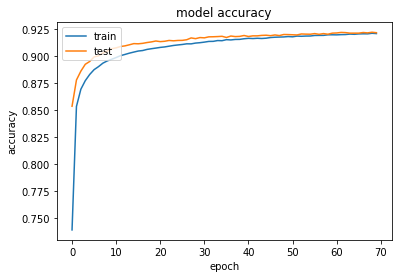

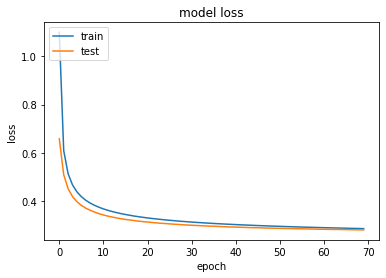

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.9225
Test accuracy: 0.9225000143051147


In [ ]:
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_0.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential_2'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [ ]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1566 - accuracy: 0.6796 - val_loss: 0.5076 - val_accuracy: 0.8708
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4473 - accuracy: 0.8760 - val_loss: 0.3622 - val_accuracy: 0.8998
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.8960 - val_loss: 0.3145 - val_accuracy: 0.9104
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3205 - accuracy: 0.9077 - val_loss: 0.2890 - val_accuracy: 0.9186
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2941 - accuracy: 0.9151 - val_loss: 0.2716 - val_accuracy: 0.9234
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.9215 - val_loss: 0.2528 - val_accuracy: 0.9285
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2559 - accuracy: 0.9265 - val_loss: 0.2381 - val_accuracy: 0.9338

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


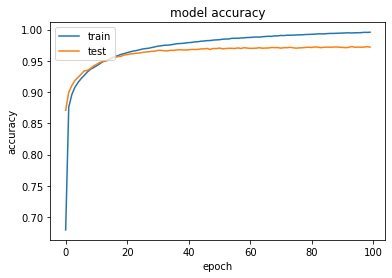

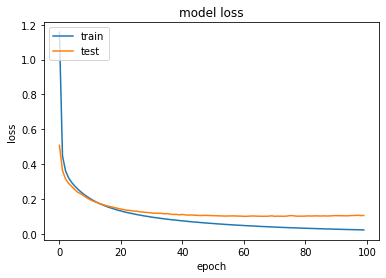

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9741
Test accuracy: 0.9740999937057495


In [ ]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe0615b70d0>>

In [ ]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00905668, -0.05275926,  0.08102819, ...,  0.06432072,
          0.02442905, -0.04353124],
        [ 0.0018096 , -0.01198981,  0.0730977 , ...,  0.00699314,
         -0.08319515,  0.03072901],
        [ 0.00790378,  0.07713924,  0.03601737, ...,  0.03376666,
          0.00413927, -0.06852572],
        ...,
        [-0.0222328 , -0.01444981, -0.05099125, ...,  0.00522052,
          0.0716094 ,  0.03870472],
        [ 0.00400416,  0.01925264, -0.06740057, ...,  0.0078355 ,
          0.03710775, -0.05736594],
        [-0.07661891, -0.01553776,  0.02334645, ...,  0.01159184,
          0.06258797, -0.05901103]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.00479253, -0.01051887,  0.03476979,  0.06401788,  0.17322767,
         0.08727887, -0.02815609,  0.06955926,  0.00334593,  0.03750657,
        -0.05620203, -0.01634301,  0.10565895, -0.09930494, -0.0870

In [ ]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 1.2779 - accuracy: 0.5995 - val_loss: 0.5121 - val_accuracy: 0.8708
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.6239 - accuracy: 0.8087 - val_loss: 0.3634 - val_accuracy: 0.8978
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4970 - accuracy: 0.8507 - val_loss: 0.3103 - val_accuracy: 0.9094
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4352 - accuracy: 0.8703 - val_loss: 0.2773 - val_accuracy: 0.9184
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3912 - accuracy: 0.8829 - val_loss: 0.2527 - val_accuracy: 0.9252
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3622 - accuracy: 0.8944 - val_loss: 0.2350 - val_accuracy: 0.9315
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3367 - accuracy: 0.9007 - val_loss: 0.2204 - val_accuracy: 0.9350
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


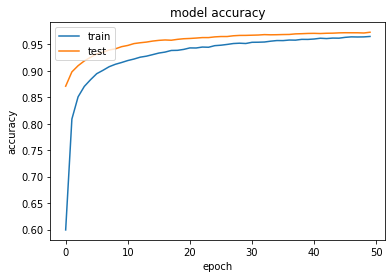

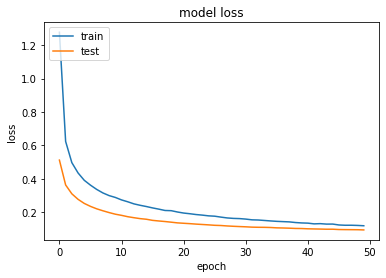

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9716
Test accuracy: 0.9715999960899353


In [ ]:
model_2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe061512a10>>

In [ ]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.03005665,  0.03060613, -0.07695048, ...,  0.00329079,
          0.01479067, -0.05831984],
        [ 0.01624852,  0.04645751, -0.01501041, ..., -0.03008251,
         -0.020017  , -0.07064428],
        [-0.02673357, -0.00132411,  0.02076811, ...,  0.03442084,
          0.0182706 , -0.00779283],
        ...,
        [ 0.07712623,  0.04799026,  0.0196327 , ..., -0.07409789,
         -0.02149357,  0.05369062],
        [-0.00196514,  0.06665991, -0.05827645, ...,  0.04878315,
          0.03928343, -0.01254059],
        [ 0.0432516 , -0.0724154 , -0.04931682, ...,  0.04064395,
         -0.01425727,  0.04465579]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.00521017,  0.1072632 ,  0.05227957, -0.04841295,  0.00353092,
         0.12678468,  0.00231456, -0.04944144,  0.00982093, -0.00226823,
         0.02114191, -0.0089276 ,  0.05178568, -0.08360423,  0.06

In [ ]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrain

###Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.7238 - accuracy: 0.7742 - val_loss: 0.2373 - val_accuracy: 0.9304
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3436 - accuracy: 0.8991 - val_loss: 0.1807 - val_accuracy: 0.9461
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2806 - accuracy: 0.9177 - val_loss: 0.1575 - val_accuracy: 0.9527
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2453 - accuracy: 0.9295 - val_loss: 0.1446 - val_accuracy: 0.9576
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2213 - accuracy: 0.9342 - val_loss: 0.1301 - val_accuracy: 0.9613
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2040 - accuracy: 0.9392 - val_loss: 0.1202 - val_accuracy: 0.9657
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1892 - accuracy: 0.9445 - val_loss: 0.1148 - val_accuracy: 0.9677
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


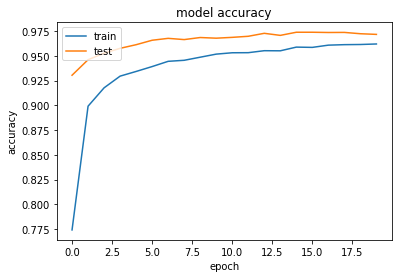

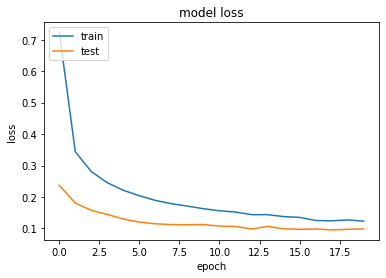

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9700
Test accuracy: 0.9700000286102295


In [ ]:
model_3.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe0612ca350>>

In [ ]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.06038588,  0.0290936 , -0.03470471, ..., -0.07583128,
          0.03513001,  0.01095739],
        [-0.06093385, -0.05729401,  0.04029664, ..., -0.0286314 ,
         -0.0209031 ,  0.0580282 ],
        [ 0.05132542, -0.05948028, -0.03397   , ...,  0.04052515,
          0.0670904 , -0.01352464],
        ...,
        [-0.00307508, -0.05781683, -0.05317953, ..., -0.0389124 ,
         -0.07719132,  0.02833924],
        [-0.03956166, -0.02347921, -0.02710706, ...,  0.01354656,
         -0.06729294, -0.08175277],
        [ 0.0507764 , -0.0573199 , -0.0578059 , ..., -0.02226465,
          0.07505859, -0.01117825]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.03387972,  0.24147163, -0.32781246, -0.22320049,  0.2268021 ,
        -0.14874151,  0.00188945,  0.11317822,  0.23730692, -0.00923215,
        -0.08655814,  0.01503637, -0.02469548, -0.04439609,  0.1373

In [ ]:
model_3.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_2',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrai

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 7s 17ms/step - loss: 0.3041 - accuracy: 0.9082 - val_loss: 0.1282 - val_accuracy: 0.9624
Epoch 2/31
375/375 [==============================] - 6s 16ms/step - loss: 0.1260 - accuracy: 0.9628 - val_loss: 0.0959 - val_accuracy: 0.9719
Epoch 3/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0928 - accuracy: 0.9720 - val_loss: 0.0888 - val_accuracy: 0.9731
Epoch 4/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0727 - accuracy: 0.9771 - val_loss: 0.0849 - val_accuracy: 0.9758
Epoch 5/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0616 - accuracy: 0.9804 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 6/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0828 - val_accuracy: 0.9762
Epoch 7/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0462 - accuracy: 0.9843 - val_loss: 0.0861 - val_accuracy: 0.9770

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9847
Test accuracy: 0.9847000241279602


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


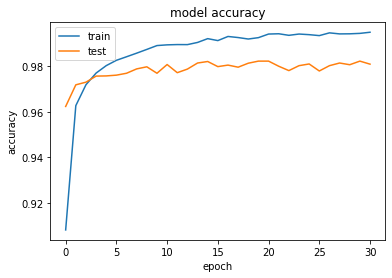

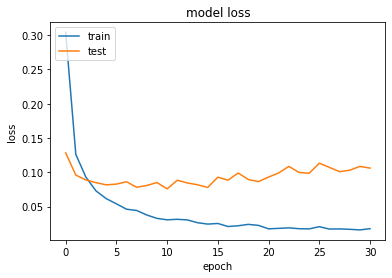

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe06100c810>>

In [ ]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06095198, -0.05326482,  0.04723078, ..., -0.01372945,
          0.06678312, -0.01229135],
        [ 0.03012962, -0.02762496, -0.02494696, ...,  0.05090459,
         -0.00145765,  0.05126211],
        [-0.03794818, -0.06709076, -0.06680916, ..., -0.06370718,
          0.02034449, -0.05415701],
        ...,
        [ 0.00878829,  0.06626529,  0.04031032, ...,  0.00736591,
          0.06237577,  0.00996121],
        [ 0.04671254, -0.01777416, -0.00588175, ..., -0.03072101,
          0.0471812 , -0.00374145],
        [-0.01446258, -0.0006663 ,  0.06601728, ...,  0.05299446,
         -0.06594819,  0.01823406]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 4.59245183e-02,  3.48742902e-02,  1.76114286e-03, -1.39387831e-01,
        -7.19114617e-02, -1.48884598e-02,  1.00420706e-01, -1.99339893e-02,
        -7.41795003e-02, -6.49660304e-02, -5.42339832e-02, 

In [ ]:
model_4.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_4',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 10s 13ms/step - loss: 0.2687 - accuracy: 0.9170 - val_loss: 0.1437 - val_accuracy: 0.9558
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.1238 - accuracy: 0.9615 - val_loss: 0.0989 - val_accuracy: 0.9695
Epoch 3/30
750/750 [==============================] - 9s 11ms/step - loss: 0.0906 - accuracy: 0.9717 - val_loss: 0.0908 - val_accuracy: 0.9751
Epoch 4/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 5/30
750/750 [==============================] - 9s 11ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.0868 - val_accuracy: 0.9765
Epoch 6/30
750/750 [==============================] - 9s 11ms/step - loss: 0.0581 - accuracy: 0.9814 - val_loss: 0.0834 - val_accuracy: 0.9777
Epoch 7/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0927 - val_accuracy: 0.975

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


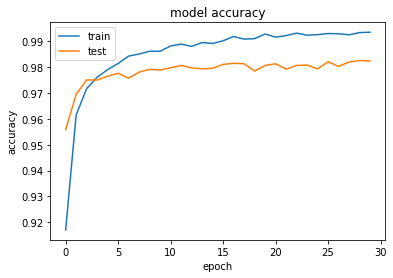

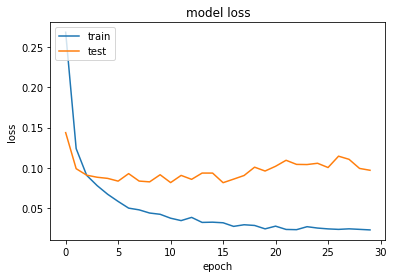

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0851 - accuracy: 0.9842
Test accuracy: 0.9842000007629395


In [ ]:
model_5.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe0603bd210>>

In [ ]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02224709,  0.03942628,  0.0046008 , ...,  0.0210328 ,
          0.05804786,  0.01824287],
        [ 0.02159729,  0.03427514,  0.00334824, ..., -0.03647591,
          0.01969989,  0.02764522],
        [ 0.05944514,  0.00874309,  0.00644622, ..., -0.05683674,
         -0.02955864,  0.04708638],
        ...,
        [ 0.0452061 , -0.03609342,  0.06516749, ..., -0.06717803,
         -0.0236091 ,  0.0368773 ],
        [ 0.01145611, -0.0250757 , -0.03654446, ...,  0.04940595,
         -0.06584809, -0.05322608],
        [ 0.03957167, -0.02083637,  0.01210051, ...,  0.06541276,
         -0.05927677,  0.04620696]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.79048043e-02, -2.12225631e-01,  9.57486704e-02, -5.15793599e-02,
        -3.55973542e-02, -4.64246385e-02, -5.38424635e-03,  2.73758695e-02,
        -9.05140564e-02, -8.07208866e-02, -1.43903866e-01, 

In [ ]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 12s 15ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.1185 - val_accuracy: 0.9799
Epoch 2/50
750/750 [==============================] - 11s 15ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.1051 - val_accuracy: 0.9827
Epoch 3/50
750/750 [==============================] - 11s 15ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.1156 - val_accuracy: 0.9793
Epoch 4/50
750/750 [==============================] - 11s 15ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.1266 - val_accuracy: 0.9780
Epoch 5/50
750/750 [==============================] - 11s 15ms/step - loss: 0.0300 - accuracy: 0.9923 - val_loss: 0.1212 - val_accuracy: 0.9803
Epoch 6/50
750/750 [==============================] - 11s 15ms/step - loss: 0.0284 - accuracy: 0.9930 - val_loss: 0.1092 - val_accuracy: 0.9815
Epoch 7/50
750/750 [==============================] - 12s 16ms/step - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.1196 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


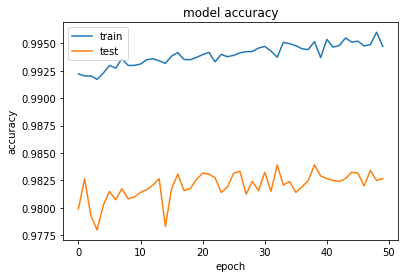

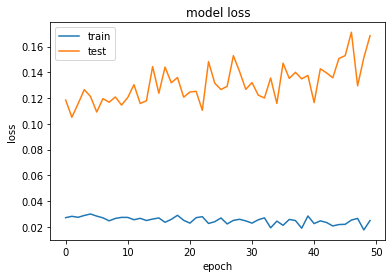

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1428 - accuracy: 0.9836
Test accuracy: 0.9836000204086304


In [ ]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 10)                5

In [ ]:
model_6.weights

In [ ]:
model_6.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each hidden layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more hidden layer to the network?
- What is the accuracy score if we use RMSprop for model 6?
- Does manipulating the learning rate affect the model? Justify your answer.
- What is the best parameter configuration for this project?


###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist) with best accuracy
- Prepare the dataset for the model
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy

**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?
 